In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine Learning /Classified Data/Classified Data',index_col=0)
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


Standardized the Variables

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [5]:
scaler.fit(df.drop('TARGET CLASS', axis=1))


StandardScaler(copy=True, with_mean=True, with_std=True)

In [6]:
scaled_features = scaler.transform(df.drop('TARGET CLASS', axis=1))

In [7]:
df_feat = pd.DataFrame(scaled_features, columns= df.columns[:-1])
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


Model Fit

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features, df['TARGET CLASS'], test_size=0.20)


In [10]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
# I randomly chose the n_neighbors as 5

In [11]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [12]:
pred = knn.predict(X_test)

Prediction and Evaluation

In [13]:
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay

In [14]:
cm=confusion_matrix(y_test, pred)

In [15]:
cmd_obj = ConfusionMatrixDisplay(cm, display_labels=['Class 1', 'Class 0'])

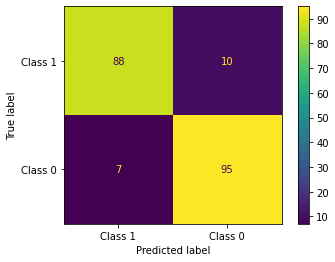

In [16]:
cmd_obj.plot()

In [17]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.93      0.90      0.91        98
           1       0.90      0.93      0.92       102

    accuracy                           0.92       200
   macro avg       0.92      0.91      0.91       200
weighted avg       0.92      0.92      0.91       200



Choosing the best K-Value

In [18]:
error_rate = {}
errors =[]

# Will take some time
for i in range(1,60):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    e_rate = np.mean(pred_i != y_test)
    error_rate[i]= e_rate

mini=1000
for key, val in error_rate.items():
  errors.append(val)
  if val< mini:
    mini=val

index = min(error_rate, key=error_rate.get)
print("index:", index)
print("minimum value:",mini)


index: 32
minimum value: 0.05


Text(0, 0.5, 'Error Rate')

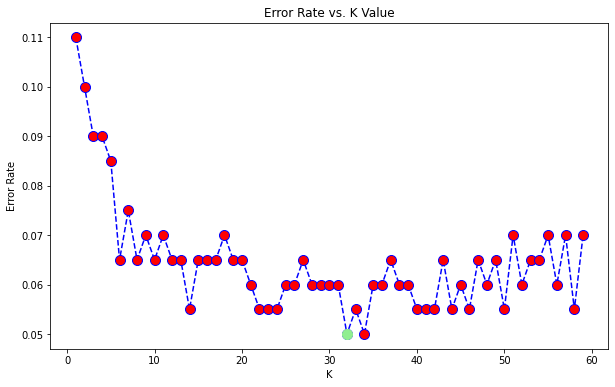

In [19]:
plt.figure(figsize=(10,6))
plt.plot(range(1,60), errors, color="blue",markerfacecolor='red', linestyle='dashed', marker='o', markersize=10)
plt.plot(index,mini,color="lightgreen",marker='o', markersize=10) 
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

New Model with K=32

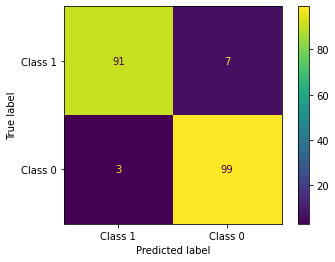

In [20]:
knn = KNeighborsClassifier(n_neighbors=32)

knn.fit(X_train,y_train)
pred2 = knn.predict(X_test)

cm=confusion_matrix(y_test, pred2)
cmd_obj = ConfusionMatrixDisplay(cm, display_labels=['Class 1', 'Class 0'])
cmd_obj.plot()


In [21]:
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95        98
           1       0.93      0.97      0.95       102

    accuracy                           0.95       200
   macro avg       0.95      0.95      0.95       200
weighted avg       0.95      0.95      0.95       200



In [22]:
# Using KNN with 23 neighbors, we increased the accuracy rate from 92% to 95%.